In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/Users/ashutoshsharma/Desktop/Python/datasets/titanic.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [5]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [7]:
df[df['embarked'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


### Missing not at random MNAR

In [9]:
df['cabin_null'] = np.where(df['cabin'].isnull(),1,0)

In [11]:
df['cabin_null'].mean()

0.7752941176470588

In [12]:
df.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'cabin_null'],
      dtype='object')

In [18]:
df.cabin_null[df['cabin_null'] > 0].count()

659

In [23]:
df.groupby('survived')['cabin_null'].mean()

survived
0    0.880819
1    0.594249
Name: cabin_null, dtype: float64

### Missing at random MAR

In [ ]:
### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

##### Mean/ Median/Mode replacement
When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [41]:
def impute_nan(df,variable,replacement):
    if replacement.lower() == 'mean':
        df[variable+"_mean"] = df[variable].fillna(df[variable].mean())
    elif replacement.lower() == 'median':
        df[variable+"_median"] = df[variable].fillna(df[variable].median())

In [42]:
impute_nan(df,'age','median')

In [46]:
df.age_median.std()

12.999022882894222

In [48]:
df.age.std()

14.562243434125529

<AxesSubplot:ylabel='Density'>

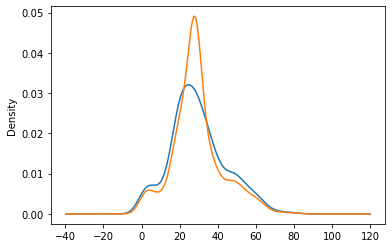

In [52]:
df.age.plot(kind='kde')
df.age_median.plot(kind='kde')

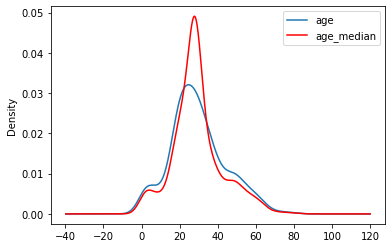

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde', ax=ax)
df.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [54]:
ax.get_legend_handles_labels()

([<matplotlib.lines.Line2D at 0x16a501e50>,
 ['age', 'age_median'])

In [ ]:
# Advantages
Easy to implement(Robust to outliers)
Faster way to obtain the complete dataset
#### Disadvantages
Change or Distortion in the original variance
Impacts Correlation